In [2]:
# load data: already in vector form
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print(train_data[1])

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                        ])

In [7]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [8]:
x_val = x_train[:10000]

partial_x_train = x_train[10000:]

y_val = train_labels[:10000]

partial_y_train = train_labels[10000:]

In [9]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step - accuracy: 0.6944 - loss: 0.6063 - val_accuracy: 0.8501 - val_loss: 0.4094
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8859 - loss: 0.3490 - val_accuracy: 0.8847 - val_loss: 0.3116
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9209 - loss: 0.2445 - val_accuracy: 0.8684 - val_loss: 0.3167
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9358 - loss: 0.1986 - val_accuracy: 0.8810 - val_loss: 0.2940
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9514 - loss: 0.1552 - val_accuracy: 0.8899 - val_loss: 0.2772
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9578 - loss: 0.1341 - val_accuracy: 0.8800 - val_loss: 0.3022
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9671 - loss: 0.1125 - val_accuracy: 0.8805 - val_loss: 0.3124
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9730 - loss: 0.0960 - val_accuracy: 0.8829 - 

In [10]:
history.history

{'accuracy': [0.7738666534423828,
  0.8881999850273132,
  0.9183333516120911,
  0.9341333508491516,
  0.9484666585922241,
  0.955133318901062,
  0.9646000266075134,
  0.9702000021934509,
  0.9780666828155518,
  0.9810666441917419,
  0.9851333498954773,
  0.987933337688446,
  0.993066668510437,
  0.9944000244140625,
  0.9946666955947876,
  0.9955333471298218,
  0.9968000054359436,
  0.9992666840553284,
  0.997866690158844,
  0.9972000122070312],
 'loss': [0.5339940786361694,
  0.33022740483283997,
  0.24150431156158447,
  0.19548766314983368,
  0.15968330204486847,
  0.1364617496728897,
  0.1146743893623352,
  0.0993112325668335,
  0.08102193474769592,
  0.07092908024787903,
  0.05844702571630478,
  0.05039757117629051,
  0.03856617584824562,
  0.03257250040769577,
  0.028936581686139107,
  0.02417084388434887,
  0.0199825931340456,
  0.0123685821890831,
  0.014415707439184189,
  0.014649240300059319],
 'val_accuracy': [0.8500999808311462,
  0.8847000002861023,
  0.868399977684021,
  0.

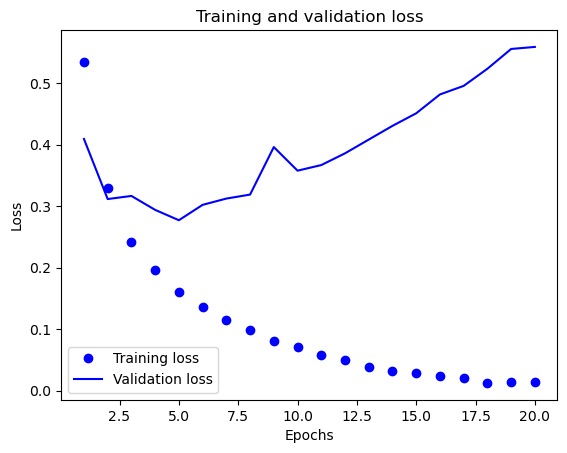

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

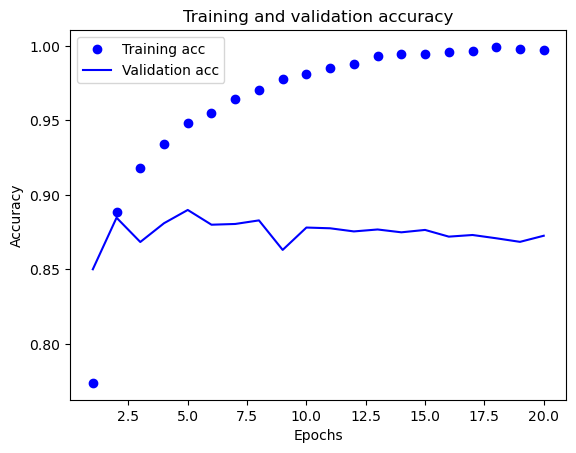

In [12]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
model = keras.Sequential([
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),layers.Dense(1, activation="sigmoid")
                      ])
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train, train_labels, epochs=4, batch_size=512)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - accuracy: 0.7028 - loss: 0.5934
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8942 - loss: 0.3137
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9233 - loss: 0.2242
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9359 - loss: 0.1851


In [14]:
results = model.evaluate(x_test, test_labels)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8826 - loss: 0.2924


In [15]:
results

[0.2885099947452545, 0.8853999972343445]

In [16]:
review1 = """this film was just brilliant casting location scenery story direction everyone's
really suited the part they played and you could just imagine being there robert ?
is an amazing actor and now the same being director ? father came from the same scottish
island as myself so i loved the fact there was a real connection with this film the witty """

review2="""
remarks throughout the film were great it was just brilliant so much that i bought the film as
soon as it was released for and would recommend it to everyone to watch and the fly fishing
was amazing really cried at the end it was so sad and you know what they say if you cry at a film
it must have been good and this definitely was also to the two little boy's that played the ? of
norman and paul they were just brilliant children are often left out of the ? list i think because
the stars that play them all grown up are such a big profile for the whole film but these children are
amazing and should be praised for what they have done don't you think the whole story was so lovely because
it was true and was someone's life after all that was shared with us all"""
reviews = [review2,review1]

In [17]:
from tensorflow.keras.layers import TextVectorization
import tensorflow as tf
import string
import re

def custom_standardization_fn(string_tensor):
  lowercase_string = tf.strings.lower(string_tensor)
  return tf.strings.regex_replace(lowercase_string, f"[{re.escape(string.punctuation)}]", "")

def custom_split_fn(string_tensor):
  return tf.strings.split(string_tensor)

text_vectorization = TextVectorization(output_mode="int",standardize=custom_standardization_fn,split=custom_split_fn,)

In [18]:
text_vectorization

<TextVectorization name=text_vectorization, built=False>

In [19]:
text_vectorization.adapt(reviews)

In [20]:
text_vectorization.get_vocabulary()

['',
 '[UNK]',
 'the',
 'was',
 'and',
 'it',
 'film',
 'you',
 'they',
 'that',
 'so',
 'just',
 'to',
 'this',
 'i',
 'for',
 'brilliant',
 'as',
 'are',
 'amazing',
 'all',
 'a',
 'with',
 'whole',
 'what',
 'were',
 'think',
 'there',
 'story',
 'same',
 'really',
 'played',
 'of',
 'have',
 'children',
 'being',
 'because',
 'at',
 'would',
 'witty',
 'watch',
 'us',
 'up',
 'two',
 'true',
 'throughout',
 'these',
 'them',
 'suited',
 'such',
 'stars',
 'soon',
 'someones',
 'should',
 'shared',
 'scottish',
 'scenery',
 'say',
 'sad',
 'robert',
 'remarks',
 'released',
 'recommend',
 'real',
 'profile',
 'praised',
 'play',
 'paul',
 'part',
 'out',
 'often',
 'now',
 'norman',
 'myself',
 'must',
 'much',
 'lovely',
 'loved',
 'location',
 'little',
 'list',
 'life',
 'left',
 'know',
 'island',
 'is',
 'imagine',
 'if',
 'grown',
 'great',
 'good',
 'from',
 'fly',
 'fishing',
 'father',
 'fact',
 'everyones',
 'everyone',
 'end',
 'dont',
 'done',
 'director',
 'direction',


In [21]:
sequences = text_vectorization.call(reviews)

In [22]:
inputs = vectorize_sequences(sequences)

In [23]:
inputs

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [24]:
model.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


array([[0.8158419 ],
       [0.38964766]], dtype=float32)

In [26]:
model.save("model.h5")
print("Model saved successfully!")

Model saved successfully!
